In [5]:
import os
import argparse
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
import pandas as pd
df = pd.read_parquet('/Users/riccardoconci/Library/Mobile Documents/com~apple~CloudDocs/HQ_2024/Projects/2024_Harvard_AIM/Research/OPMO/Personalising-Crutches/2025.06.18/test2.parquet')
df.head()


,acc_x_time,data_2,roll,pitch,yaw,acc_x_data,acc_y_data,acc_z_data,gyro_x_data,gyro_y_data,...,data14,data15,data16,data17,data18,data19,data20,data21,data22,data23
0,6.770654e-39,2.033582e+08,-8.168185e+08,9.193805e+23,3.184534e+06,NaN,1.948417e+05,3.668067e+27,-1.326495e+16,-1.270685e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001953
1,6.770654e-39,1.849234e-04,-1.542884e+31,-9.193798e+23,-6.743106e-16,4.348445e+17,-6.174926e-25,1.106441e-08,1.078569e-11,-1.315609e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001953
2,6.770655e-39,8.328210e+11,-1.813550e-07,6.124147e-39,-7.591178e-01,2.837819e-37,2.694965e+16,-4.710781e-30,4.722882e+01,7.385090e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001953
3,6.770655e-39,3.578668e+21,3.750749e-32,-4.322911e-14,3.655852e-35,1.277914e-21,1.551140e+34,2.649925e-15,9.480971e+01,3.650090e-32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001953
4,6.770655e-39,3.491979e+18,1.506852e+28,-6.916651e-13,4.745874e-02,-1.996584e-23,5.860972e-31,2.564788e-18,-6.112771e-25,2.393153e+32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001953


In [33]:
df['time'] = df['acc_x_time'] 
df['time'] = df['time'] - df['time'].iloc[0];



In [34]:
df['time']

0        0.000000e+00
1        0.000000e+00
2        1.434930e-42
3        1.434930e-42
4        1.434930e-42
             ...     
34835    1.525474e-38
34836    1.525474e-38
34837    1.525617e-38
34838    1.525617e-38
34839    1.525617e-38
Name: time, Length: 34840, dtype: float32

<Axes: xlabel='acc_x_time'>

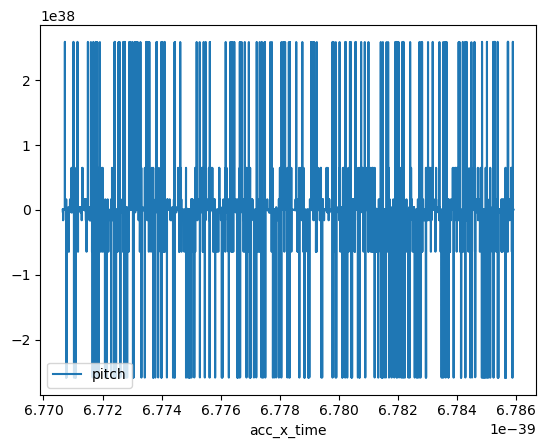

In [35]:
df.plot(x = 'acc_x_time', y ='pitch')

In [20]:
df.rename(columns = {'data1': 'time'}, inplace = True)


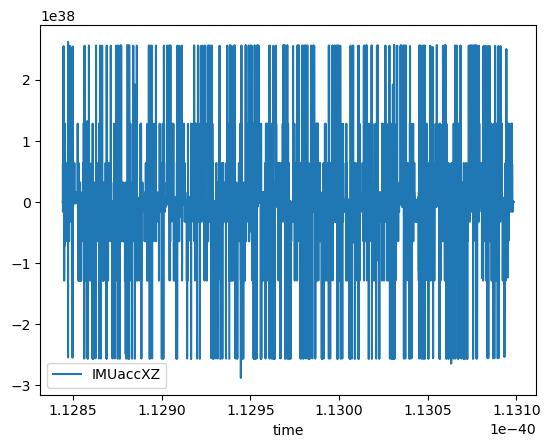

In [21]:
df.plot(x = 'time', y ='IMUaccXZ')
plt.show()

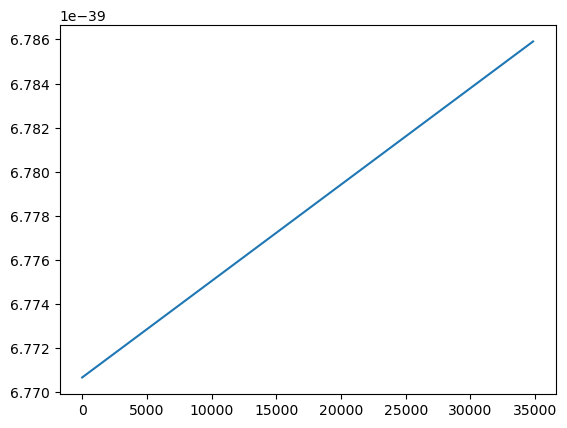

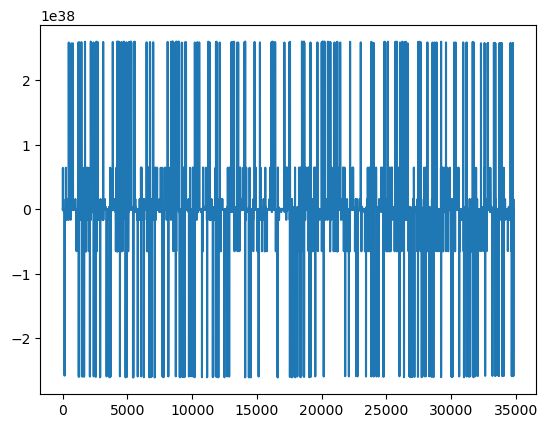

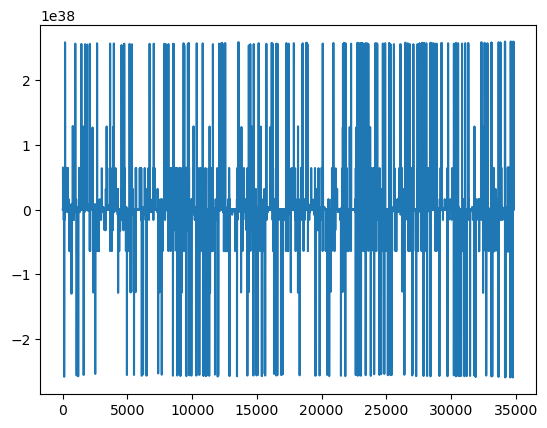

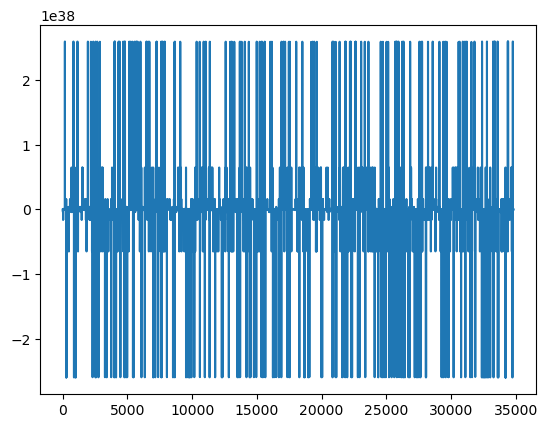

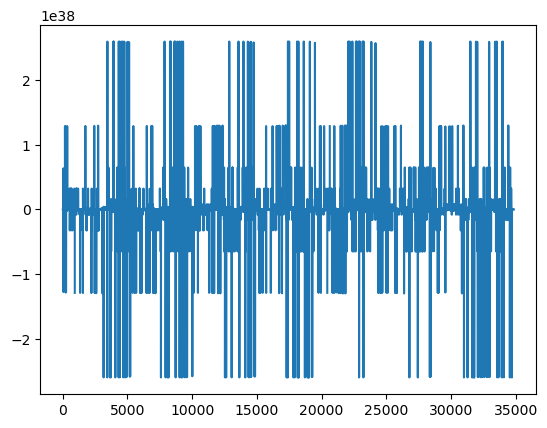

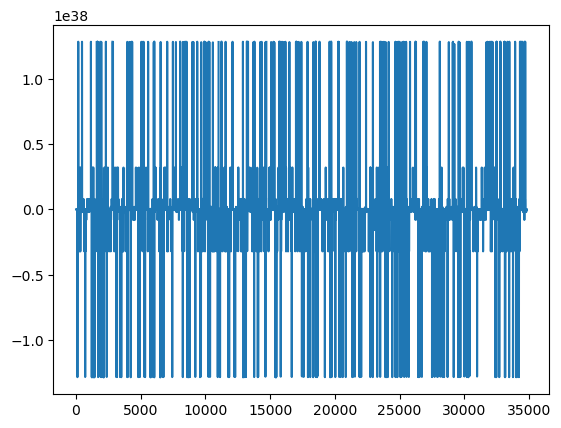

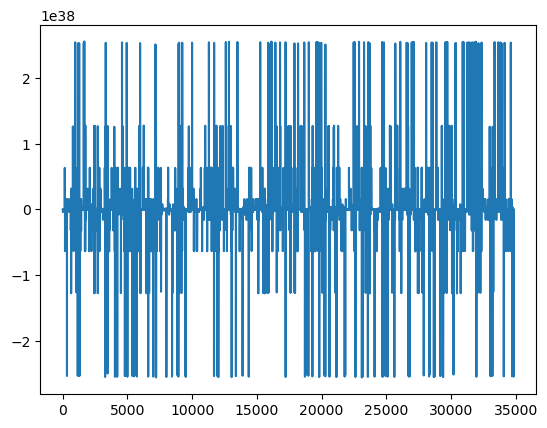

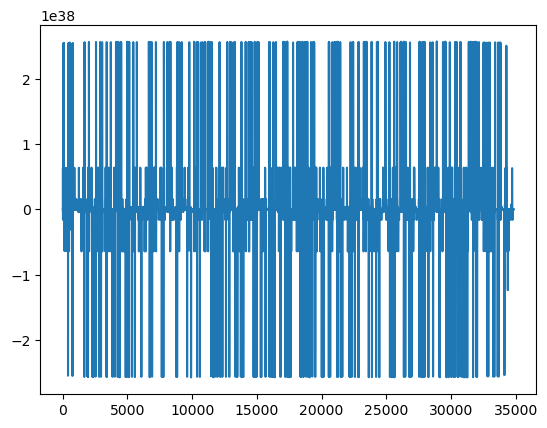

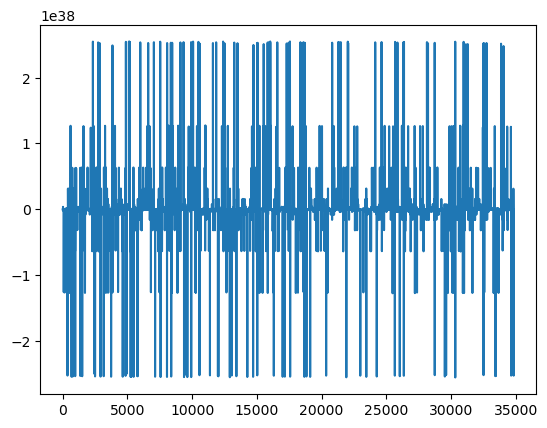

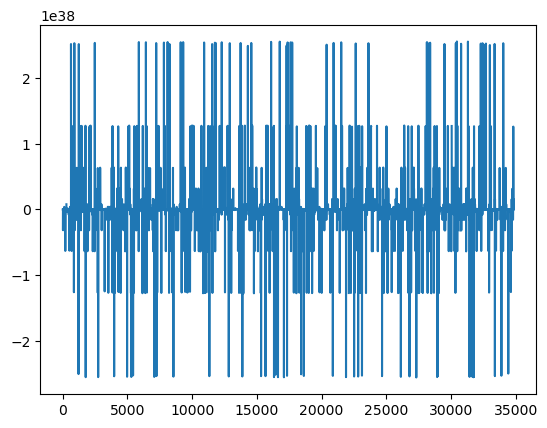

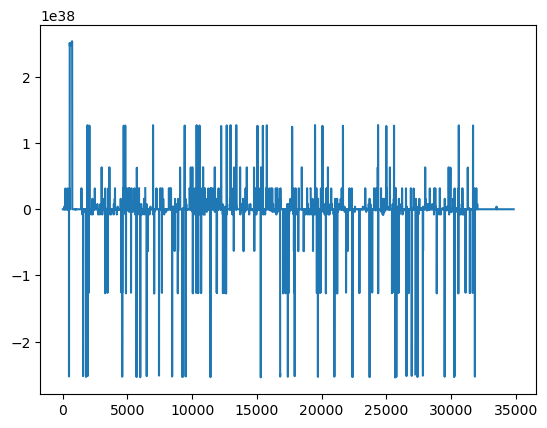

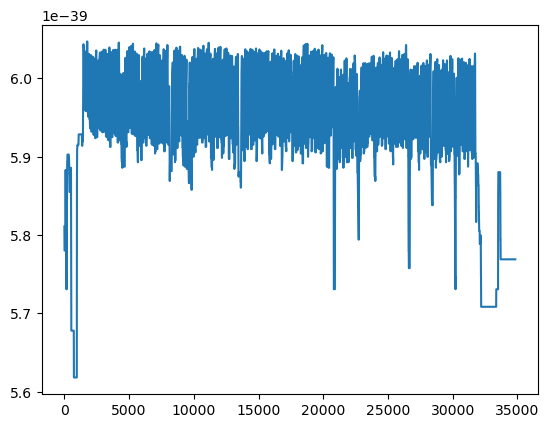

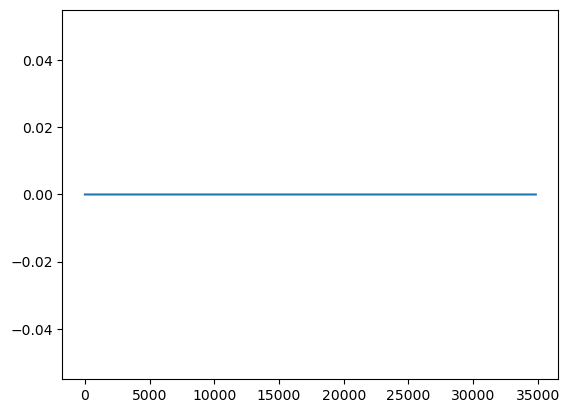

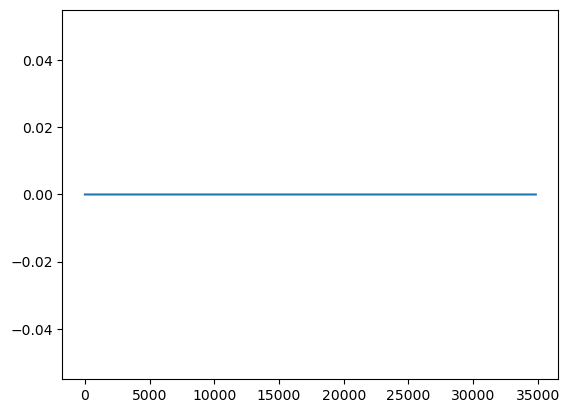

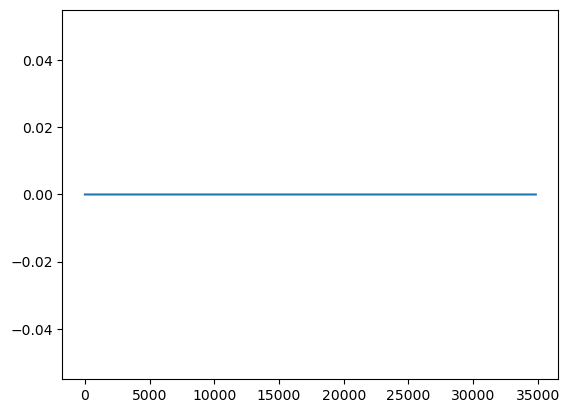

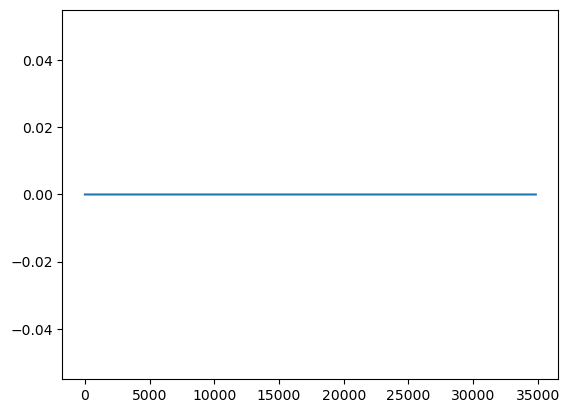

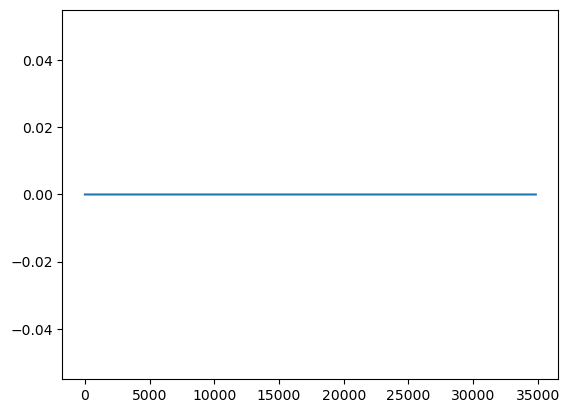

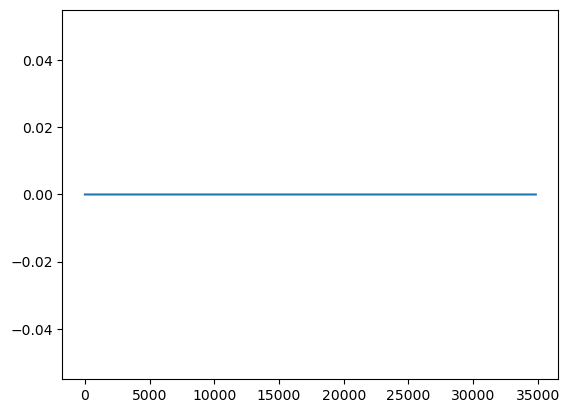

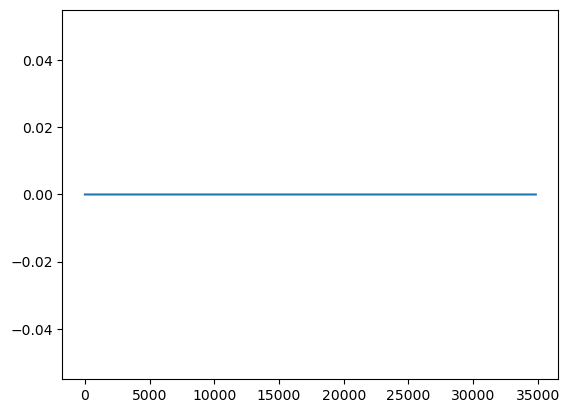

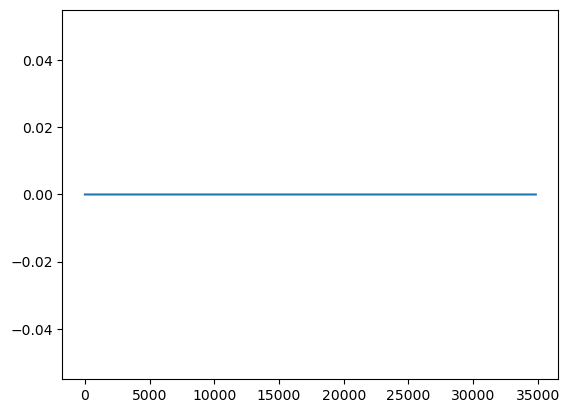

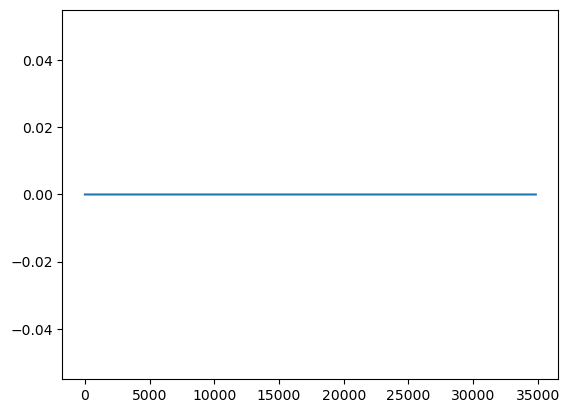

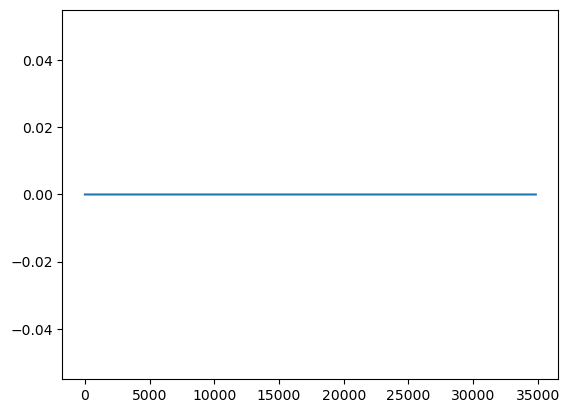

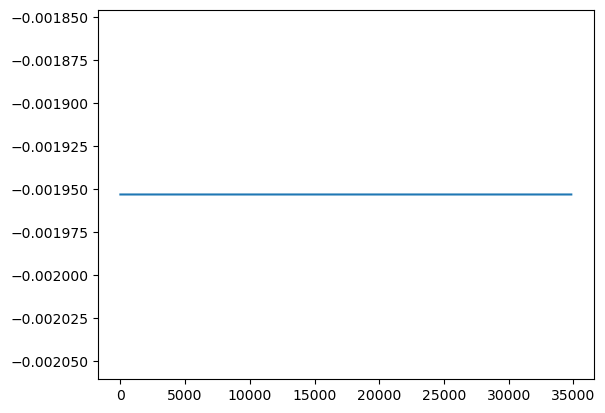

In [8]:

for i in df.columns:
    plt.figure()
    plt.plot(df[i])
    plt.show()




In [2]:
import pandas as pd
import matplotlib.pyplot as plt

luke_test_df = pd.read_parquet('/Users/riccardoconci/Library/Mobile Documents/com~apple~CloudDocs/HQ_2024/Projects/2024_Harvard_AIM/Research/OPMO/Personalising-Crutches/2025.06.18/Luke_test2.parquet')


In [3]:
ground_truth_steps_df = pd.read_csv('/Users/riccardoconci/Library/Mobile Documents/com~apple~CloudDocs/HQ_2024/Projects/2024_Harvard_AIM/Research/OPMO/Personalising-Crutches/2025.06.18/steps_ground_truth_LukeTest.csv')


In [4]:
ground_truth_steps_df

,Step Times,Accel XZ
0,15.16,16.114878
1,16.53,14.629354
2,17.95,15.166340
3,19.24,16.162913
4,20.70,14.810047
...,...,...
196,311.80,17.124817
197,313.15,13.535819
198,314.60,15.692652
199,316.02,15.894390


In [5]:
luke_test_df['acc_z_x_data'] = luke_test_df['acc_x_data'] + luke_test_df['acc_z_data']

In [9]:
luke_test_df['time'] =(luke_test_df['acc_x_time'] - luke_test_df['acc_x_time'].iloc[0])/1000

In [7]:
luke_test_df['force']

0        0.774728
1        0.652628
2        0.530528
3        0.530528
4        0.530528
           ...   
34835    0.408427
34836    0.408427
34837    0.408427
34838    0.408427
34839    0.408427
Name: force, Length: 34840, dtype: float32

In [61]:
import numpy as np
import plotly.graph_objects as go

# Extract time and sensor data
time = luke_test_df['time']
force = luke_test_df['force']
acc_x = luke_test_df['acc_x_data']
acc_z = luke_test_df['acc_z_data']

# 1. Compute acceleration vector magnitude
vector = (acc_x**2 + acc_z**2)

# 2. Compute gradient of the force with respect to time
d_force_dt = np.gradient(force, time)
threshold = d_force_dt.min()*0.2
d_force_dt_filtered = np.where(d_force_dt > threshold, 0, d_force_dt)
# 3. Compute the difference
vector_minus_grad_force = (vector - d_force_dt_filtered)**2


# 4. Create interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time,
    y=vector,
    mode='lines',
    name='Accel Vector Magnitude',
    line=dict(dash='solid')
))

fig.add_trace(go.Scatter(
    x=time,
    y=d_force_dt_filtered,
    mode='lines',
    name='Gradient of Force',
    line=dict(dash='dot')
))

fig.add_trace(go.Scatter(
    x=time,
    y=vector_minus_grad_force,
    mode='lines',
    name='Vector - d(Force)/dt',
    line=dict(dash='solid')
))

# Layout styling
fig.update_layout(
    title='Accel Vector, Gradient of Force, and Their Difference',
    xaxis_title='Time',
    yaxis_title='Value',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

fig.show()

-36.636199951171875


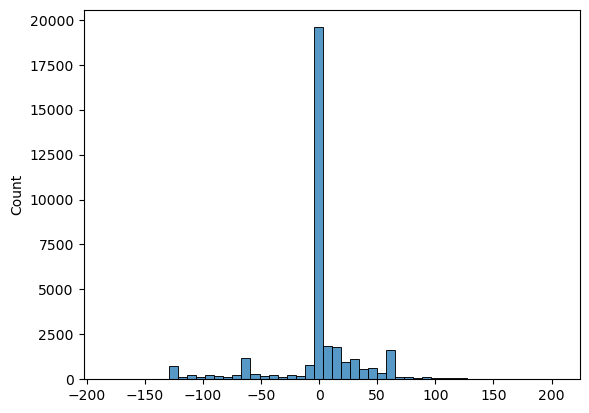

0.0


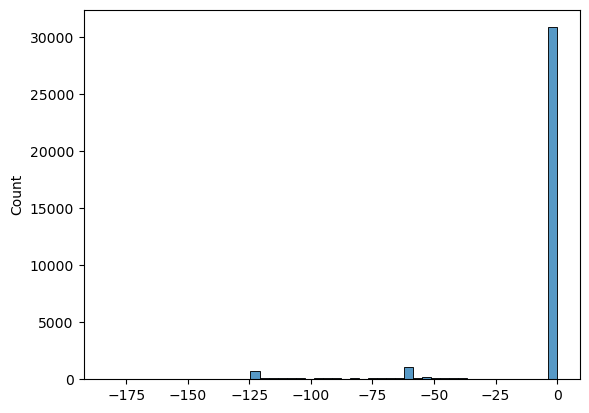

In [60]:
print(d_force_dt_filtered.max())
sns.histplot(d_force_dt_filtered, bins=50)
plt.show()

In [69]:
from scipy.signal import find_peaks
initial_troughs, _  = find_peaks(d_force_dt_filtered)


In [70]:
initial_troughs

array([ 1576,  1639,  1644,  1716,  1782,  1789,  1851,  1917,  1988,
        2056,  2061,  2130,  2196,  2267,  2339,  2343,  2407,  2475,
        2481,  2546,  2617,  2684,  2753,  2758,  2829,  2892,  2899,
        2902,  2979,  3125,  3186,  3189,  3193,  3197,  3267,  3333,
        3339,  3345,  3415,  3488,  3492,  3498,  3503,  3507,  3574,
        3641,  3652,  3725,  3797,  3799,  3869,  3935,  3940,  3947,
        4016,  4089,  4092,  4097,  4156,  4215,  4223,  4231,  4239,
        4297,  4358,  4360,  4363,  4474,  4583,  4586,  4588,  4594,
        4661,  4726,  4733,  4808,  4955,  5026,  5036,  5101,  5171,
        5244,  5315,  5317,  5390,  5462,  5530,  5592,  5598,  5680,
        5758,  5765,  5828,  5888,  5965,  6044,  6052,  6114,  6172,
        6183,  6185,  6247,  6308,  6313,  6374,  6507,  6579,  6582,
        6644,  6701,  6704,  6710,  6775,  6835,  6839,  6843,  6907,
        6967,  6975,  6986,  6990,  6993,  7056,  7125,  7128,  7134,
        7199,  7264,

In [ ]:
findpeaks(d_force_dt_filtered, 

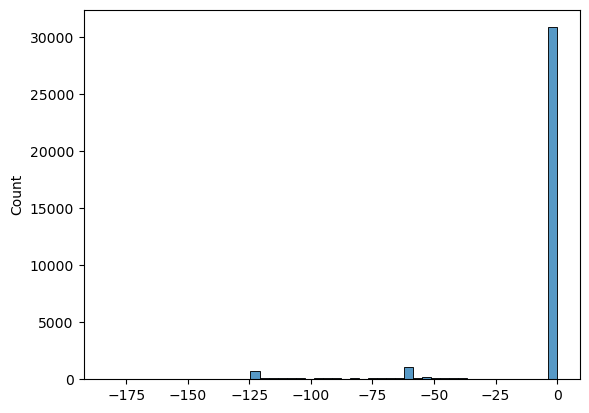

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(d_force_dt_filtered, bins=50)
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(d_force_dt_filtered, bins=100)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

array([   12,     3,     0,     0,     0,     3,     4,     0,     6,
           1,     3,     4,     0,     3,     0,     2,     5,     0,
           5,     1,     4,     8,     0,     7,     2,     8,     6,
           0,     8,     2,    13,    13,     0,   701,    23,    53,
          69,     0,    84,    26,    57,    69,     0,    84,    25,
          36,    80,     0,    70,    16,    46,    64,     0,    57,
          23,    51,    64,     0,    85,    26,    54,    75,     0,
          91,    40,    54,  1082,     0,   114,    32,    71,    85,
           0,    86,    26,    55,    75,     0,    68,    32,    49,
          65,     0,    85,    31,    41,    89,     0,   103,    36,
          43,   100,     0,   117,    80,   128,   446,     0,   730,
       28725])

In [40]:
negative_mask = bin_centers < 0
negative_counts = counts[negative_mask]
negative_centers = bin_centers[negative_mask]
max_idx = np.argmax(negative_counts)
most_negative_common_bin = negative_centers[max_idx]
most_negative_common_count = negative_counts[max_idx]

In [41]:
most_negative_common_count

28725

In [37]:
peak_positions

array([-171.27423 , -167.61061 , -162.11519 , -158.45157 , -152.95613 ,
       -149.29251 , -143.79709 , -140.13347 , -136.46985 , -130.97441 ,
       -121.81537 , -116.31993 , -112.65631 , -107.16089 , -103.49727 ,
        -98.00183 ,  -94.33821 ,  -88.84279 ,  -85.17917 ,  -79.68373 ,
        -76.02011 ,  -70.52469 ,  -66.86107 ,  -61.365635,  -57.702015,
        -52.206585,  -48.542965,  -43.047535,  -39.383915,  -33.888485,
        -30.224865,  -24.729435,  -21.065815,  -15.570385,  -11.906765,
         -6.411335], dtype=float32)

In [35]:
valid = (peak_positions < -5) & (peak_counts > np.percentile(counts, 90))
filtered_peaks = peak_positions[valid]

NameError: name 'peak_positions' is not defined